## Gestion du traitement des données
*Adrien Somarandy - 40008118*

Nous nous concentrerons dans cette partie sur le développement des fonctions permettant la manipulation de données nutritionnelles et pondérales.

En effet, le logiciel doit être capable :

- Pour la partie **nutrition** :
    - d'effectuer une recherche dans une base de donnée
    - d'extraire des informations sur le résultat de cette recherche
    - d'interpéter ces informations
    - sauvegarder ces informations
- Pour la partie **poids/IMC** : 
    - demander une information
    - sauvegarder l'information
    - calculer l'évolution entre l'information rentrée et la précédente information
        
*Veuillez noter que les fonctions ci-présentes sont réalisées de manière à ce qu'elles puissent fonctionner sans interface. Il est fort probable d'observer certaines différences dans le programme final, dues à l'adaptation de ces fonctions pour fonctionner avec l'interface gérée par tkinter.*

### Partie Nutrition

#### Fonction de recherche

##### Préparation de la base

Comme précisé dans l'introduction, nous utiliserons une base de données extraite du site Open Food Facts (https://fr.openfoodfacts.org/data), comportant les informatinos de produits vendus à la Réunion. Il s'agit d'une base au format .csv. Ainsi, nous pourrons la manipuler avec python grâce au module csv.

Nous créons donc une fonction permettant de préparer la base de données à être utilisée dans le logiciel. Cette fonction prend en argument le nom d'un fichier, va ensuite l'ouvrir, lire toutes les informations et retourner une liste de dictionnaires, où un dictionnaire comporte les informations d'un produit.

In [1]:
import csv
def file_to_list(file_name):
    """Fonction prenant en argument le nom d'un fichier csv,
    et retourne une liste de dictionnaires des données de ce fichier"""
    with open(str(file_name), 'r', encoding='UTF-8') as file:
        return list(csv.DictReader(file, delimiter=';'))

In [2]:
BASE = file_to_list("./base_aliments_reu_reduite.csv")

Observons ci-dessous le dictionnaire d'un produit en exemple :

In [3]:
print(BASE[3])

{'\ufeffcode': '3,36964E+12', 'url': 'https://world-fr.openfoodfacts.org/produit/3369640039083', 'product_name': 'Buchette chèvre cranberry', 'quantity': '', 'brands': '', 'categories': '', 'manufacturing_places': '', 'labels': '', 'labels_tags': '', 'countries': 'en:re', 'ingredients_text': '', 'nutriscore_grade': '', 'nova_group': '', 'pnns_groups_1': 'unknown', 'main_category': '', 'image_url': 'https://static.openfoodfacts.org/images/products/336/964/003/9083/front_fr.3.400.jpg', 'energy-kj_100g': '', 'energy-kcal_100g': '274', 'energy_100g': '1146', 'fat_100g': '20', 'saturated-fat_100g': '12.2', 'omega-3-fat_100g': '', 'carbohydrates_100g': '8.7', 'sugars_100g': '8.5', 'fiber_100g': '', 'proteins_100g': '14.7', 'salt_100g': '1', 'sodium_100g': '0.4', 'vitamin-a_100g': '', 'vitamin-d_100g': '', 'vitamin-e_100g': '', 'vitamin-k_100g': '', 'vitamin-c_100g': '', 'vitamin-b1_100g': '', 'vitamin-b2_100g': '', 'vitamin-pp_100g': '', 'vitamin-b6_100g': '', 'vitamin-b9_100g': '', 'folates

Par cette fonction nous avons donc une liste des dictionnaires de chaque produit. Nous devons maintenant réaliser une fonction de recherche pur que l'utilisateur puisse sélectionner simplement le produit qu'il souhaite ajouter. On notera que le nom du produit est associé dans le dictionnaire à la clé **"product_name"**, et la marque du produit est associée à **"brands"**.

##### Création de la fonction de recherche

Cette fonction doit :
- demander à l'utilisateur le nom du produit
- comparer les noms des produit avec celui entré par l'utilisateur
- retourner le dictionnaire correspondant au produit

La fonction prendra en argument la base de donnée qu'elle doit utiliser pour cette recherche. Comme nous avons une liste de dictionnaire, il nous suffira de regarder la valeur de la clé "product_name". Ainsi, nous pouvons créer la fonction

In [4]:
def recherche(liste_base):
    """Fonction prenant en argument la base de données csv en liste, demande le nom d'un produit, et vérifie sa présence
     dans la liste et retourne le produit choisi par l'utilisateur sous forme de dictionnaire"""

    produit = input('Entrez le nom du produit : ')
    produit = produit.lower() #afin d'assurer une correspondance exacte, la chaîne de caractère est convertie en minuscule
    for i in liste_base:
        nom = i['product_name']
        if produit in nom.lower(): #de même ici
            return i
    return "Produit non trouvé" 

In [5]:
recherche(BASE)

Entrez le nom du produit :  Nesquik


{'\ufeffcode': '3,03371E+12',
 'url': 'https://world-fr.openfoodfacts.org/produit/3033710065967',
 'product_name': 'Nesquik',
 'quantity': '1 kg',
 'brands': 'Nestlé',
 'categories': 'Beverages,Breakfasts,Cocoa and chocolate powders,Instant beverages,Chocolate powders',
 'manufacturing_places': 'Pontarlier,Franche-Comté,France',
 'labels': 'No artificial flavors,No gluten,Green Dot,Made in France',
 'labels_tags': 'en:no-artificial-flavors,en:no-gluten,en:green-dot,en:made-in-france',
 'countries': 'Algeria,Belgium,France,French Guiana,French Polynesia,Germany,Guadeloupe,Italy,Martinique,New Caledonia,Réunion,Spain,Switzerland',
 'ingredients_text': 'Sucre, cacao maigre en poudre (21,3%)°, émulsifiant : lécithine de soja ; sel, vitamines : C, B1, D; minéraux: pyrophosphate de fer, sulfate de zinc ; cannelle, arôme naturel.',
 'nutriscore_grade': 'b',
 'nova_group': '4',
 'pnns_groups_1': 'unknown',
 'main_category': 'en:chocolate-powders',
 'image_url': 'https://static.openfoodfacts.or

Cependant, un problème capital surgit avec cette première fonction : **la première occurence trouvée est automatiquement sélectionnée**. Or, plusieurs produits peuvent porter le même nom, notamment si l'utilisateur fait une recherche par le nom de l'aliment, et non la marque. Voyons un exemple concret, faisons une recherche de "Fromage".

In [6]:
recherche(BASE)

Entrez le nom du produit :  Fromage


{'\ufeffcode': '3,25623E+12',
 'url': 'https://world-fr.openfoodfacts.org/produit/3256227463532',
 'product_name': 'Snacks DIABLOS goût jambon fromage',
 'quantity': '75 g',
 'brands': 'U',
 'categories': '',
 'manufacturing_places': '',
 'labels': 'Transformé en France',
 'labels_tags': 'en:transformed-in-france',
 'countries': 'en:re, France',
 'ingredients_text': "Flocons de pomme de terre (dont sulfites) 30%, amidon de pomme de terre (dont sulfites), huile de tournesol, farine de riz, arôme (dont lait), sel, curcuma déshydraté, arômes de fumée. traces éventuelles d'arachides, de céréales contenant du gluten et de crustacés.",
 'nutriscore_grade': '',
 'nova_group': '4',
 'pnns_groups_1': 'unknown',
 'main_category': '',
 'image_url': 'https://static.openfoodfacts.org/images/products/325/622/746/3532/front_fr.16.400.jpg',
 'energy-kj_100g': '2008',
 'energy-kcal_100g': '480',
 'energy_100g': '2008',
 'fat_100g': '24',
 'saturated-fat_100g': '2.1',
 'omega-3-fat_100g': '',
 'carbohyd

Le résultat trouvé correspond à un biscuit salé aromatisé au fromage, non au produit laitier fromage.

Nous devons donc mettre en place un moyen pour que l'utilisateur puisse sélectionner l'occurence correcte dans ce que la fonction va trouver.

Nous pouvons alors créer une liste avec les occurences trouvées, afficher cette liste dans une liste numérotée, et demander à l'utilisateur d'entrer le numéro correspondant au produit qu'il a choisi. Nous ferons attention de vérifier que le numéro entré est bien un numéro dans la liste. Par la suite, la fonction retournera le dictionnaire du produit qui a été choisi. Nous déterminons alors la fonction complète :

In [7]:
def recherche_v2(liste_base):
    """Fonction prenant en argument la base de données csv en liste, demande le nom d'un produit, et vérifie sa présence
     dans la liste et retourne le produit choisi par l'utilisateur sous forme de dictionnaire"""

    produit = input('Entrez le nom du produit : ')
    produit = produit.lower()
    produits_trouves = []
    for i in liste_base:
        product_name = i['product_name']
        marque = i["brands"]
        if produit in product_name.lower() or produit in marque.lower():
            produits_trouves.append(i)

    # Mise en place d'une boucle pour proposer de nouveau la recherche si aucune occurence trouvée

    while not produits_trouves or produit == '':
        print("Produit non trouvé, réessayer")
        produit = input('Entrez le nom du produit : ')
        produit = produit.lower()
        produits_trouves = []
        for i in liste_base:
            product_name = i['product_name']
            marque = i["brands"]
            if produit in product_name.lower() or produit in marque.lower():
                produits_trouves.append(i)

    if len(produits_trouves) == 1:
        return produits_trouves[0]
        # Si une seule occurence est trouvée, le résultat est immédiatement retourné

    else:
        # Si plusieurs occurences trouvées, demander un choix à l'utilisateur
        # Affichage d'une liste des produits
        print("Voici la liste des produits trouvés :")
        compteur = 1
        for i in produits_trouves:
            if i['brands'] != '' and i['quantity'] != '':
                print(str(compteur) + '. ' + i['product_name'] + ' de ' + i['brands'] + ' | ' + i['quantity'])
                # Exemple : 1. Nom du produit de telle marque | quantité
            elif i['brands'] != '' and i['quantity'] == '':
                print(str(compteur) + '. ' + i['product_name'] + ' de ' + i['brands'])
                # Exemple : 1. Nom du produit de telle marque
            elif i['brands'] == '' and i['quantity'] != '':
                print(str(compteur) + '. ' + i['product_name'] + ' | ' + i['quantity'])
                # Exemple : 1. Nom du produit | quantité
            else:
                print(str(compteur) + '. ' + i['product_name'])
                # Exemple : 1. Nom du produit
            compteur += 1
        choix = int(input('Entrez le numéro correspondant à votre produit : '))
        while choix > compteur or choix < 1:
            print("Numéro incorrect, réessayez.")
            choix = int(input('Entrez le numéro correspondant à votre produit : '))
        return produits_trouves[choix - 1]

In [8]:
produit_test = recherche_v2(BASE)
print(produit_test)

Entrez le nom du produit :  Fromage


Voici la liste des produits trouvés :
1. Snacks DIABLOS goût jambon fromage de U | 75 g
2. Viennois Classique Epaule Crudité fromage
3. SAMOUSSAS Fromage de TONTON AHMOY | 280g
4. 3D's Bugles, Goût Fromage de Bénénuts,PepsiCo | 85 g
5. Le petit tamarin de Fromageries De Bourbon | 150 g
6. Fromage de poulet
7. Gnocchis fromage et champignons
8. Fromage blanc de Isigny Ste mere | 500 g
9. Fromage de brebis au Chili piquant
10. Snacks boule fromage de Tokapi,Marque Repère | 50 g
11. Fromage mi-chèvre rond 25%mg de Les Croisés,Marque Repère | 180 g
12. Fromage de tête de LE FLEURON DE LA REUNION | 160g
13. Snack salé fromage
14. Fromage à Pâte Dure de FROMAGIO | 100 g
15. Fromage blanc maigre nature au lait pasteurisé de Yoplait,Silhouette | 500 g
16. Nature Fromage Blanc de Piton Des Neiges | 850 g
17. Fromage de tete piment
18. Saucisses de poulet au fromage | 340 g
19. Jambon volaille 2 fromages
20. Calin - Fromage Blanc nature de Yoplait | 500 g
21. Fromage de tête piment x2 de Le Fleu

Entrez le numéro correspondant à votre produit :  35


{'\ufeffcode': '3,29756E+12', 'url': 'https://world-fr.openfoodfacts.org/produit/3297560260181', 'product_name': 'Fromage blanc', 'quantity': '', 'brands': '', 'categories': '', 'manufacturing_places': '', 'labels': '', 'labels_tags': '', 'countries': 'en:re', 'ingredients_text': '', 'nutriscore_grade': '', 'nova_group': '', 'pnns_groups_1': 'unknown', 'main_category': '', 'image_url': 'https://static.openfoodfacts.org/images/products/329/756/026/0181/front_fr.3.400.jpg', 'energy-kj_100g': '', 'energy-kcal_100g': '79', 'energy_100g': '331', 'fat_100g': '3.2', 'saturated-fat_100g': '2.1', 'omega-3-fat_100g': '', 'carbohydrates_100g': '4', 'sugars_100g': '4', 'fiber_100g': '', 'proteins_100g': '8.4', 'salt_100g': '0.1', 'sodium_100g': '0.04', 'vitamin-a_100g': '', 'vitamin-d_100g': '', 'vitamin-e_100g': '', 'vitamin-k_100g': '', 'vitamin-c_100g': '', 'vitamin-b1_100g': '', 'vitamin-b2_100g': '', 'vitamin-pp_100g': '', 'vitamin-b6_100g': '', 'vitamin-b9_100g': '', 'folates_100g': '', 'vit

Maintenant que nous avons le dictionnaire du produit que l'utilisateur a choisi, nous devons extraire les informations nutritionnelles nécessaires pour donner une analyse des apports nutritionnels journaliers de l'utilisateur.

#### Extraction des informations

Grâce au dictionnaire, l'extraction de ces informations sera très simple. Il suffira simplement de réaliser une fonction prenant en argument le dictionnaire du produit, et retournant dans une liste les informations nécessaires pour la suite. Nous réaliserons deux fonctions : 

1. Une fonction extrayant les informations générales, idéales pour afficher sur l'interface le produit qui a été choisi, elle retournera dans une liste :
    - Le nom du produit
    - Le nutriscore du produit
    - La catégorie du produit
    - La photo du produit (sous forme d'URL)
    - L'URL vers la fiche complète du produit du site Open Food Facts
    
    
2. Une fonction extrayant les apports nutritionnels du produit, pour le traitement des données nutritionnelles de l'utilisateur, elle retournera dans une liste les valeurs nutritionnelles du produit.

Observons d'abord les clés du dictionnaire d'un produit afin de choisir celles qui seront utiles pour nos fonctions :

In [9]:
print(list(BASE[0]))

['\ufeffcode', 'url', 'product_name', 'quantity', 'brands', 'categories', 'manufacturing_places', 'labels', 'labels_tags', 'countries', 'ingredients_text', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'main_category', 'image_url', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'omega-3-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g']


Ainsi, pour notre première fonction nous prendrons les valeurs associées à :
- 'product_name'
- 'nutriscore_grade'
- 'main_category'
- 'image_url'
- 'url'

Pour notre seconde fonction nous prendrons les valeurs associées à toutes les clés de **'energy-kj_100g' à 'caffeine_100g'**. Cependant, cette fonction doit retourner des valeurs numériques pour que nous puissions ajouter aux valeurs présentes dans la sauvegarde du profil utilisateur. Or, il peut arriver que certaines clé sit associée à une valeur vide. Nous devons donc nous assurer que cette valeur soit remplacée par 0.

Nous pouvons maintenant écrire ces fonctions :

In [10]:
def extraction_info(dict_produit):
    """Fonction extrayant les informations générales d'un dictionnaire d'un produit et les retournant
    sous forme d'une liste"""
    info_a_extraire = ['product_name', 'main_category', 'nutriscore_grade', 'image_url', 'url']
    info_extraites = []
    for i in info_a_extraire:
        info_extraites.append(dict_produit[i])
    return info_extraites


def extraction_nutriment(dict_produit):
    """Fonction extrayant les informations nutritionnelles d'un dictionnaire d'un produit et les retournant
    sous forme d'une liste"""
    if type(dict_produit) == dict:
        l = []
        for i in dict_produit:
            l.append(dict_produit[i])
        l = l[16:]
        for i in range(len(l)):
            if l[i] == '':
                l[i] = 0
            else:
                l[i] = float(l[i])
        return l
    else:
        return "Erreur produit"

In [11]:
extraction_info(produit_test)
nutri_test = extraction_nutriment(produit_test)
print(nutri_test)

[0, 79.0, 331.0, 3.2, 2.1, 0, 4.0, 4.0, 0, 8.4, 0.1, 0.04, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Comme nous connaissons la composition du dictionnaire, nous savons à quel nutriment est associé chaque valeur. Nous créons alors une liste comportant ces nutriments, dans l'ordre, que nous utiliserons dans d'autres fonctions : 

In [12]:
liste_nutriments = ['energy-kj_u', 'energy-kcal_u', 'energy_u', 'fat_u', 'saturated-fat_u', 'omega-3-fat_u',
                    'carbohydrates_u', 'sugars_u', 'fiber_u', 'proteins_u', 'salt_u', 'sodium_u', 'vitamin-a_u',
                    'vitamin-d_u', 'vitamin-e_u', 'vitamin-k_u', 'vitamin-c_u', 'vitamin-b1_u', 'vitamin-b2_u',
                    'vitamin-pp_u', 'vitamin-b6_u', 'vitamin-b9_u', 'folates_u', 'vitamin-b12_u', 'biotin_u',
                    'pantothenic-acid_u', 'silica_u', 'bicarbonate_u', 'potassium_u', 'calcium_u', 'phosphorus_u',
                    'iron_u', 'magnesium_u', 'zinc_u', 'manganese_u', 'fluoride_u', 'selenium_u', 'chromium_u',
                    'molybdenum_u', 'iodine_u', 'caffeine_u']

Nous avons maintenant la liste des apports nutritionnels. Cependant il s'agit d'un apport après avoir consommé 100g du produit. Nous devons donc demander à l'utilisateur la quantité de produit consommé et calculer l'apport en fonction de cette quantité. Ainsi nous avons la fonction "calcul_quantite" :

In [13]:
def calcul_quantite(nutriments):
    """Fonction prenant la liste d'apports nutritionnels pour 100g du produit, demandant la quantité de produit consommé,
    et retournant la liste d'apports nutritionnels pour la quantité consommée."""
    quantite = int(input('Entrez la quantité de produit consommé (en grammes): '))
    nutriments_calcules = []
    for i in nutriments:
        nutriments_calcules.append(round((i * quantite) / 100, 3))
    return nutriments_calcules

In [14]:
quantite_test = calcul_quantite(nutri_test)

Entrez la quantité de produit consommé (en grammes):  12300


In [15]:
print(quantite_test)

[0.0, 9717.0, 40713.0, 393.6, 258.3, 0.0, 492.0, 492.0, 0.0, 1033.2, 12.3, 4.92, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Nous avons maintenant la liste des valeurs des apports pour chaque nutriment en fonction de la quantité de produit consommée par l'utilisateur. Nous pouvons maintenant réaliser une fonction qui va ajouter ces valeurs à la sauvegarde concernant la nutrition du profil utilisateur, qui sera ensuite utilisée pour analyser et interpréter l'apport nutritionnel journalier de l'utilisateur. La fonction prendra en argument la liste des valeurs nutritionnelles, et le dictionnaire de sauvegarde.

Avant de continuer, afin de s'aligner sur le dictionnaire de sauvegarde, nous déclarerons une variable globale 'jour' qui sera utilisé pour accéder correctement à la sauvegarde.

In [29]:
from datetime import date
jour_brut = date.today()
jour = jour_brut.isoformat()

Nous pouvons désormais créer la fonction d'ajout des valeurs dans la sauvegarde :

In [17]:
def ajout_nutriments(nutriments, sauvegarde):
    """Fonction prenant en argument la liste des valeurs nutritionnelles à ajouter aux valeurs sauvegardées
    au jour actuel et la sauvegarde à modifier, et effectue l'ajout de ces valeurs à celles du jour actuel"""
    compteur = 0 #le compteur nous permettra de calculer l'indice du nutriment à récupérer dans la liste nutriments 
    for i in liste_nutriments:
        sauvegarde[jour][i] += nutriments[compteur] 
        compteur += 1
    return

In [18]:
save = {}
val = {}
for i in liste_nutriments:
    val[i] = 0
save[jour] = val

ajout_nutriments(quantite_test, save)

Pour terminer cette partie Nutrition, nous devons maintenant interpréter les données sauvegardées au jour d'aujourd'hui et les comparer aux recommandations nutritionelles.

Concernant les recommandations nutritionnelles, nous nous baserons sur ce rapport du ministère de la santé britannique (https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/618167/government_dietary_recommendations.pdf) détaillant les recommandations pour chaque nutriment en fonction de l'âge et du sexe. Nous créerons des dictionnaires comportant la valeur des recommandations pour chaque nutriment. Ainsi nous nous retrouverons avec ces dictionnaires :

In [19]:
reco_1an_m = {'energy-kj_u': 3200,
              'energy-kcal_u': 765, 'energy_u': 3200, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 0, 'sugars_u': 0, 'fiber_u': 0, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.004, 'vitamin-k_u': 0, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0003, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.005, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000070, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000006,
              'pantothenic-acid_u': 0, 'silica_u': '', 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0.0005,
              'selenium_u': 0.000012, 'chromium_u': 0,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_1an_f = {'energy-kj_u': 3000,
              'energy-kcal_u': 717, 'energy_u': 3000, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 0, 'sugars_u': 0, 'fiber_u': 0, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.004, 'vitamin-k_u': 0.000070, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0003, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.0047, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000070, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000006,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0.0005,
              'selenium_u': 0.000012, 'chromium_u': 0,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_3an_m = {'energy-kj_u': 4550,
              'energy-kcal_u': 1088, 'energy_u': 4550, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 145, 'sugars_u': 15, 'fiber_u': 15, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.006, 'vitamin-k_u': 0.000015, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0004, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.0072, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000100, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000012,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0,
              'selenium_u': 0.000012, 'chromium_u': 0.000025,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_3an_f = {'energy-kj_u': 4200,
              'energy-kcal_u': 1004, 'energy_u': 4200, 'fat_u': 0, 'saturated-fat_u': 0, 'omega-3-fat_u': 0,
              'carbohydrates_u': 134, 'sugars_u': 13, 'fiber_u': 15, 'proteins_u': 14.5, 'salt_u': 2, 'sodium_u': 0.8,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.006, 'vitamin-k_u': 0.000015, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0004, 'vitamin-b2_u': 0.0006,
              'vitamin-pp_u': 0.0066, 'vitamin-b6_u': 0.0007, 'vitamin-b9_u': 0.000100, 'folates_u': 0.00007,
              'vitamin-b12_u': 0.0000005, 'biotin_u': 0.000012,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 0.8, 'calcium_u': 0.35,
              'phosphorus_u': 0.27,
              'iron_u': 0.0069, 'magnesium_u': 0.085, 'zinc_u': 0.005, 'manganese_u': 0.0005, 'fluoride_u': 0,
              'selenium_u': 0.000012, 'chromium_u': 0.000025,
              'molybdenum_u': 0, 'iodine_u': 0.00007, 'caffeine_u': 0}

reco_6an_m = {'energy-kj_u': 6200,
              'energy-kcal_u': 1482, 'energy_u': 6200, 'fat_u': 58, 'saturated-fat_u': 18, 'omega-3-fat_u': 32,
              'carbohydrates_u': 198, 'sugars_u': 20, 'fiber_u': 20, 'proteins_u': 19.7, 'salt_u': 3, 'sodium_u': 1.2,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0075, 'vitamin-k_u': 0.000025, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0006, 'vitamin-b2_u': 0.0008,
              'vitamin-pp_u': 0.0098, 'vitamin-b6_u': 0.0009, 'vitamin-b9_u': 0.000150, 'folates_u': 0.0001,
              'vitamin-b12_u': 0.0000008, 'biotin_u': 0.00002,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 1.1, 'calcium_u': 0.45,
              'phosphorus_u': 0.35,
              'iron_u': 0.0061, 'magnesium_u': 0.120, 'zinc_u': 0.0065, 'manganese_u': 0.001, 'fluoride_u': 0.001,
              'selenium_u': 0.000020, 'chromium_u': 0.000035,
              'molybdenum_u': 0, 'iodine_u': 0.0001, 'caffeine_u': 0}

reco_6an_f = {'energy-kj_u': 5800, 'energy-kcal_u': 1378, 'energy_u': 5800, 'fat_u': 54, 'saturated-fat_u': 17,
              'omega-3-fat_u': 30,
              'carbohydrates_u': 184, 'sugars_u': 18, 'fiber_u': 20, 'proteins_u': 19.7, 'salt_u': 3, 'sodium_u': 1.2,
              'vitamin-a_u': 0.0004,
              'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0075, 'vitamin-k_u': 0.000025, 'vitamin-c_u': 0.03,
              'vitamin-b1_u': 0.0006, 'vitamin-b2_u': 0.0008,
              'vitamin-pp_u': 0.0091, 'vitamin-b6_u': 0.0009, 'vitamin-b9_u': 0.000150, 'folates_u': 0.0001,
              'vitamin-b12_u': 0.0000008, 'biotin_u': 0.00002,
              'pantothenic-acid_u': 0, 'silica_u': 0, 'bicarbonate_u': 0, 'potassium_u': 1.1, 'calcium_u': 0.45,
              'phosphorus_u': 0.35,
              'iron_u': 0.0061, 'magnesium_u': 0.120, 'zinc_u': 0.0065, 'manganese_u': 0.001, 'fluoride_u': 0.001,
              'selenium_u': 0.000020, 'chromium_u': 0.000035,
              'molybdenum_u': 0, 'iodine_u': 0.0001, 'caffeine_u': 0}

reco_10ans_m = {'energy-kj_u': 7600, 'energy-kcal_u': 1817, 'energy_u': 7600, 'fat_u': 71, 'saturated-fat_u': 22,
                'omega-3-fat_u': 39,
                'carbohydrates_u': 242, 'sugars_u': 24, 'fiber_u': 20, 'proteins_u': 28.3, 'salt_u': 5, 'sodium_u': 2,
                'vitamin-a_u': 0.0005,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.009, 'vitamin-k_u': 0.00004, 'vitamin-c_u': 0.03,
                'vitamin-b1_u': 0.0007,
                'vitamin-b2_u': 0.001, 'vitamin-pp_u': 0.012, 'vitamin-b6_u': 0.001, 'vitamin-b9_u': 0.0002,
                'folates_u': 0.00015,
                'vitamin-b12_u': 0.000001, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 2, 'calcium_u': 0.55, 'phosphorus_u': 0.45, 'iron_u': 0.0087, 'magnesium_u': 0.2,
                'zinc_u': 0.007,
                'manganese_u': 0.0015, 'fluoride_u': 0.002, 'selenium_u': 0.00003, 'chromium_u': 0.00004,
                'molybdenum_u': 0,
                'iodine_u': 0.00011, 'caffeine_u': 0}

reco_10ans_f = {'energy-kj_u': 7100, 'energy-kcal_u': 1703, 'energy_u': 7600, 'fat_u': 66, 'saturated-fat_u': 21,
                'omega-3-fat_u': 37,
                'carbohydrates_u': 227, 'sugars_u': 23, 'fiber_u': 20, 'proteins_u': 28.3, 'salt_u': 5, 'sodium_u': 2,
                'vitamin-a_u': 0.0005,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.009, 'vitamin-k_u': 0.00004, 'vitamin-c_u': 0.03,
                'vitamin-b1_u': 0.0007,
                'vitamin-b2_u': 0.001, 'vitamin-pp_u': 0.0112, 'vitamin-b6_u': 0.001, 'vitamin-b9_u': 0.0002,
                'folates_u': 0.00015,
                'vitamin-b12_u': 0.000001, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 2, 'calcium_u': 0.55, 'phosphorus_u': 0.45, 'iron_u': 0.0087, 'magnesium_u': 0.2,
                'zinc_u': 0.007,
                'manganese_u': 0.0015, 'fluoride_u': 0.002, 'selenium_u': 0.00003, 'chromium_u': 0.00004,
                'molybdenum_u': 0,
                'iodine_u': 0.00011, 'caffeine_u': 0}

reco_14ans_m = {'energy-kj_u': 10500, 'energy-kcal_u': 2500, 'energy_u': 10500, 'fat_u': 97, 'saturated-fat_u': 31,
                'omega-3-fat_u': 54,
                'carbohydrates_u': 333, 'sugars_u': 33, 'fiber_u': 25, 'proteins_u': 42.1, 'salt_u': 6, 'sodium_u': 2.4,
                'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.035,
                'vitamin-b1_u': 0.001,
                'vitamin-b2_u': 0.0012, 'vitamin-pp_u': 0.0165, 'vitamin-b6_u': 0.0012, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.000001, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.1, 'calcium_u': 1, 'phosphorus_u': 0.775, 'iron_u': 0.0113, 'magnesium_u': 0.28,
                'zinc_u': 0.009,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00013, 'caffeine_u': 0}

reco_14ans_f = {'energy-kj_u': 8400, 'energy-kcal_u': 2000, 'energy_u': 8400, 'fat_u': 78, 'saturated-fat_u': 24,
                'omega-3-fat_u': 43, 'carbohydrates_u': 267, 'sugars_u': 27, 'fiber_u': 25, 'proteins_u': 41.2,
                'salt_u': 6, 'sodium_u': 2.4, 'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.035,
                'vitamin-b1_u': 0.0008,
                'vitamin-b2_u': 0.0011, 'vitamin-pp_u': 0.0132, 'vitamin-b6_u': 0.001, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000012, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.1, 'calcium_u': 0.8, 'phosphorus_u': 0.625, 'iron_u': 0.0148, 'magnesium_u': 0.28,
                'zinc_u': 0.009,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00013, 'caffeine_u': 0}

reco_18ans_m = {'energy-kj_u': 10500, 'energy-kcal_u': 2500, 'energy_u': 10500, 'fat_u': 97, 'saturated-fat_u': 31,
                'omega-3-fat_u': 54,
                'carbohydrates_u': 333, 'sugars_u': 33, 'fiber_u': 30, 'proteins_u': 55.2, 'salt_u': 6, 'sodium_u': 2.4,
                'vitamin-a_u': 0.0007, 'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0099, 'vitamin-k_u': 0.000065,
                'vitamin-c_u': 0.04, 'vitamin-b1_u': 0.001,
                'vitamin-b2_u': 0.0013, 'vitamin-pp_u': 0.0165, 'vitamin-b6_u': 0.0015, 'vitamin-b9_u': 0.00033,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 1, 'phosphorus_u': 0.775, 'iron_u': 0.0113, 'magnesium_u': 0.3,
                'zinc_u': 0.0095,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.00007, 'chromium_u': 0.00005,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

reco_18ans_f = {'energy-kj_u': 8400, 'energy-kcal_u': 2000, 'energy_u': 8400, 'fat_u': 78, 'saturated-fat_u': 24,
                'omega-3-fat_u': 43, 'carbohydrates_u': 267, 'sugars_u': 27, 'fiber_u': 25, 'proteins_u': 45,
                'salt_u': 6, 'sodium_u': 2.4, 'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.04,
                'vitamin-b1_u': 0.0008,
                'vitamin-b2_u': 0.0011, 'vitamin-pp_u': 0.0132, 'vitamin-b6_u': 0.0012, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 0.8, 'phosphorus_u': 0.625, 'iron_u': 0.0148, 'magnesium_u': 0.28,
                'zinc_u': 0.007,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

reco_75ans_m = {'energy-kj_u': 10500, 'energy-kcal_u': 2500, 'energy_u': 10500, 'fat_u': 97, 'saturated-fat_u': 31,
                'omega-3-fat_u': 54,
                'carbohydrates_u': 333, 'sugars_u': 33, 'fiber_u': 30, 'proteins_u': 55.5, 'salt_u': 6, 'sodium_u': 2.4,
                'vitamin-a_u': 0.0007, 'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.0099, 'vitamin-k_u': 0.000065,
                'vitamin-c_u': 0.04, 'vitamin-b1_u': 0.001,
                'vitamin-b2_u': 0.0013, 'vitamin-pp_u': 0.0165, 'vitamin-b6_u': 0.0015, 'vitamin-b9_u': 0.00033,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 0.7, 'phosphorus_u': 0.55, 'iron_u': 0.0087, 'magnesium_u': 0.3,
                'zinc_u': 0.0095,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000075, 'chromium_u': 0.00005,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

reco_75ans_f = {'energy-kj_u': 8400, 'energy-kcal_u': 2000, 'energy_u': 8400, 'fat_u': 78, 'saturated-fat_u': 24,
                'omega-3-fat_u': 43, 'carbohydrates_u': 267, 'sugars_u': 27, 'fiber_u': 25, 'proteins_u': 45,
                'salt_u': 6, 'sodium_u': 2.4, 'vitamin-a_u': 0.0006,
                'vitamin-d_u': 0.00001, 'vitamin-e_u': 0.011, 'vitamin-k_u': 0.000045, 'vitamin-c_u': 0.04,
                'vitamin-b1_u': 0.0008,
                'vitamin-b2_u': 0.0011, 'vitamin-pp_u': 0.0132, 'vitamin-b6_u': 0.0012, 'vitamin-b9_u': 0.0003,
                'folates_u': 0.0002,
                'vitamin-b12_u': 0.0000015, 'biotin_u': 0.000025, 'pantothenic-acid_u': 0, 'silica_u': 0,
                'bicarbonate_u': 0,
                'potassium_u': 3.5, 'calcium_u': 0.7, 'phosphorus_u': 0.55, 'iron_u': 0.0148, 'magnesium_u': 0.27,
                'zinc_u': 0.007,
                'manganese_u': 0.002, 'fluoride_u': 0.003, 'selenium_u': 0.000045, 'chromium_u': 0.000045,
                'molybdenum_u': 0,
                'iodine_u': 0.00014, 'caffeine_u': 0}

Maintenant, nous devons créer une fonction prenant en argument l'âge, le sexe, et le dictionnaire associé au jour d'exécution du logiciel de la sauvegarde nutritionnelle du profil d'utilisateur. La fonction choisira le dictionnaire de recommandation adéquat en fonction du sexe et de l'âge de l'utilisateur, et retournera un dictionnaire ayant comme clé le nutriment, et en valeur la qualité de cet apport.

Nous ferons attention de vérifier à la comparaison, en effet pour certains nutriments l'apport ne doit pas dépasser une certaine valeur, tandis que pour d'autre il doit dépasser une certaine valeur.

In [20]:
def comparaison(sexe, age, nutriments):
    """Fonction prenant en argument le sexe, l'age et les infos nutritionnelles du profil utilisateur, compare avec les
        recommandation journalières et retourne un dictionnaire du résultat pour chaque nutriment"""
    res = {}
    elements_a_pas_depasser = ['fat_u', 'saturated-fat_u', 'sugars_u', 'salt_u', 'omega-3-fat_u', 'energy-kj_u',
                               'energy-kcal_u', 'energy_u']
    # mise en place du dictionnaire de recommandations nutritionnels journalières
    if sexe == 'H':
        if 0 <= age < 2:
            rnj = reco_1an_m
        elif 2 <= age < 4:
            rnj = reco_3an_m
        elif 4 <= age < 7:
            rnj = reco_6an_m
        elif 7 <= age < 11:
            rnj = reco_10ans_m
        elif 11 <= age < 15:
            rnj = reco_14ans_m
        elif 15 <= age < 18:
            rnj = reco_18ans_m
        else:
            rnj = reco_75ans_m
    else:
        if 0 <= age < 2:
            rnj = reco_1an_f
        elif 2 <= age < 4:
            rnj = reco_3an_f
        elif 4 <= age < 7:
            rnj = reco_6an_f
        elif 7 <= age < 11:
            rnj = reco_10ans_f
        elif 11 <= age < 15:
            rnj = reco_14ans_f
        elif 15 <= age < 18:
            rnj = reco_18ans_f
        else:
            rnj = reco_75ans_f

    for i in liste_nutriments:
        if i in elements_a_pas_depasser:
            if nutriments[i] > rnj[i]:
                res[i] = 'Dépassement'
            elif (rnj[i] - (10 * rnj[i]) / 100) <= nutriments[i] <= rnj[i]:
                res[i] = 'Apport régulier'
            else:
                res[i] = 'Apport manquant'
        else:
            if nutriments[i] < (rnj[i] - (10 * rnj[i]) / 100):
                res[i] = 'Apport manquant'
            else:
                res[i] = 'Apport régulier'
    return res

In [21]:
comparaison('H', 19, save[jour])

{'energy-kj_u': 'Apport manquant',
 'energy-kcal_u': 'Dépassement',
 'energy_u': 'Dépassement',
 'fat_u': 'Dépassement',
 'saturated-fat_u': 'Dépassement',
 'omega-3-fat_u': 'Apport manquant',
 'carbohydrates_u': 'Apport régulier',
 'sugars_u': 'Dépassement',
 'fiber_u': 'Apport manquant',
 'proteins_u': 'Apport régulier',
 'salt_u': 'Dépassement',
 'sodium_u': 'Apport régulier',
 'vitamin-a_u': 'Apport manquant',
 'vitamin-d_u': 'Apport manquant',
 'vitamin-e_u': 'Apport manquant',
 'vitamin-k_u': 'Apport manquant',
 'vitamin-c_u': 'Apport manquant',
 'vitamin-b1_u': 'Apport manquant',
 'vitamin-b2_u': 'Apport manquant',
 'vitamin-pp_u': 'Apport manquant',
 'vitamin-b6_u': 'Apport manquant',
 'vitamin-b9_u': 'Apport manquant',
 'folates_u': 'Apport manquant',
 'vitamin-b12_u': 'Apport manquant',
 'biotin_u': 'Apport manquant',
 'pantothenic-acid_u': 'Apport régulier',
 'silica_u': 'Apport régulier',
 'bicarbonate_u': 'Apport régulier',
 'potassium_u': 'Apport manquant',
 'calcium_u': 

Nous avons désormais effectué tout le traitement nécessaire pour les données nutritionnelles. Examinons désormais le traitement des données pondérales.

Voici un schéma récapitulant l'utilisation des fonctions dans cette partie.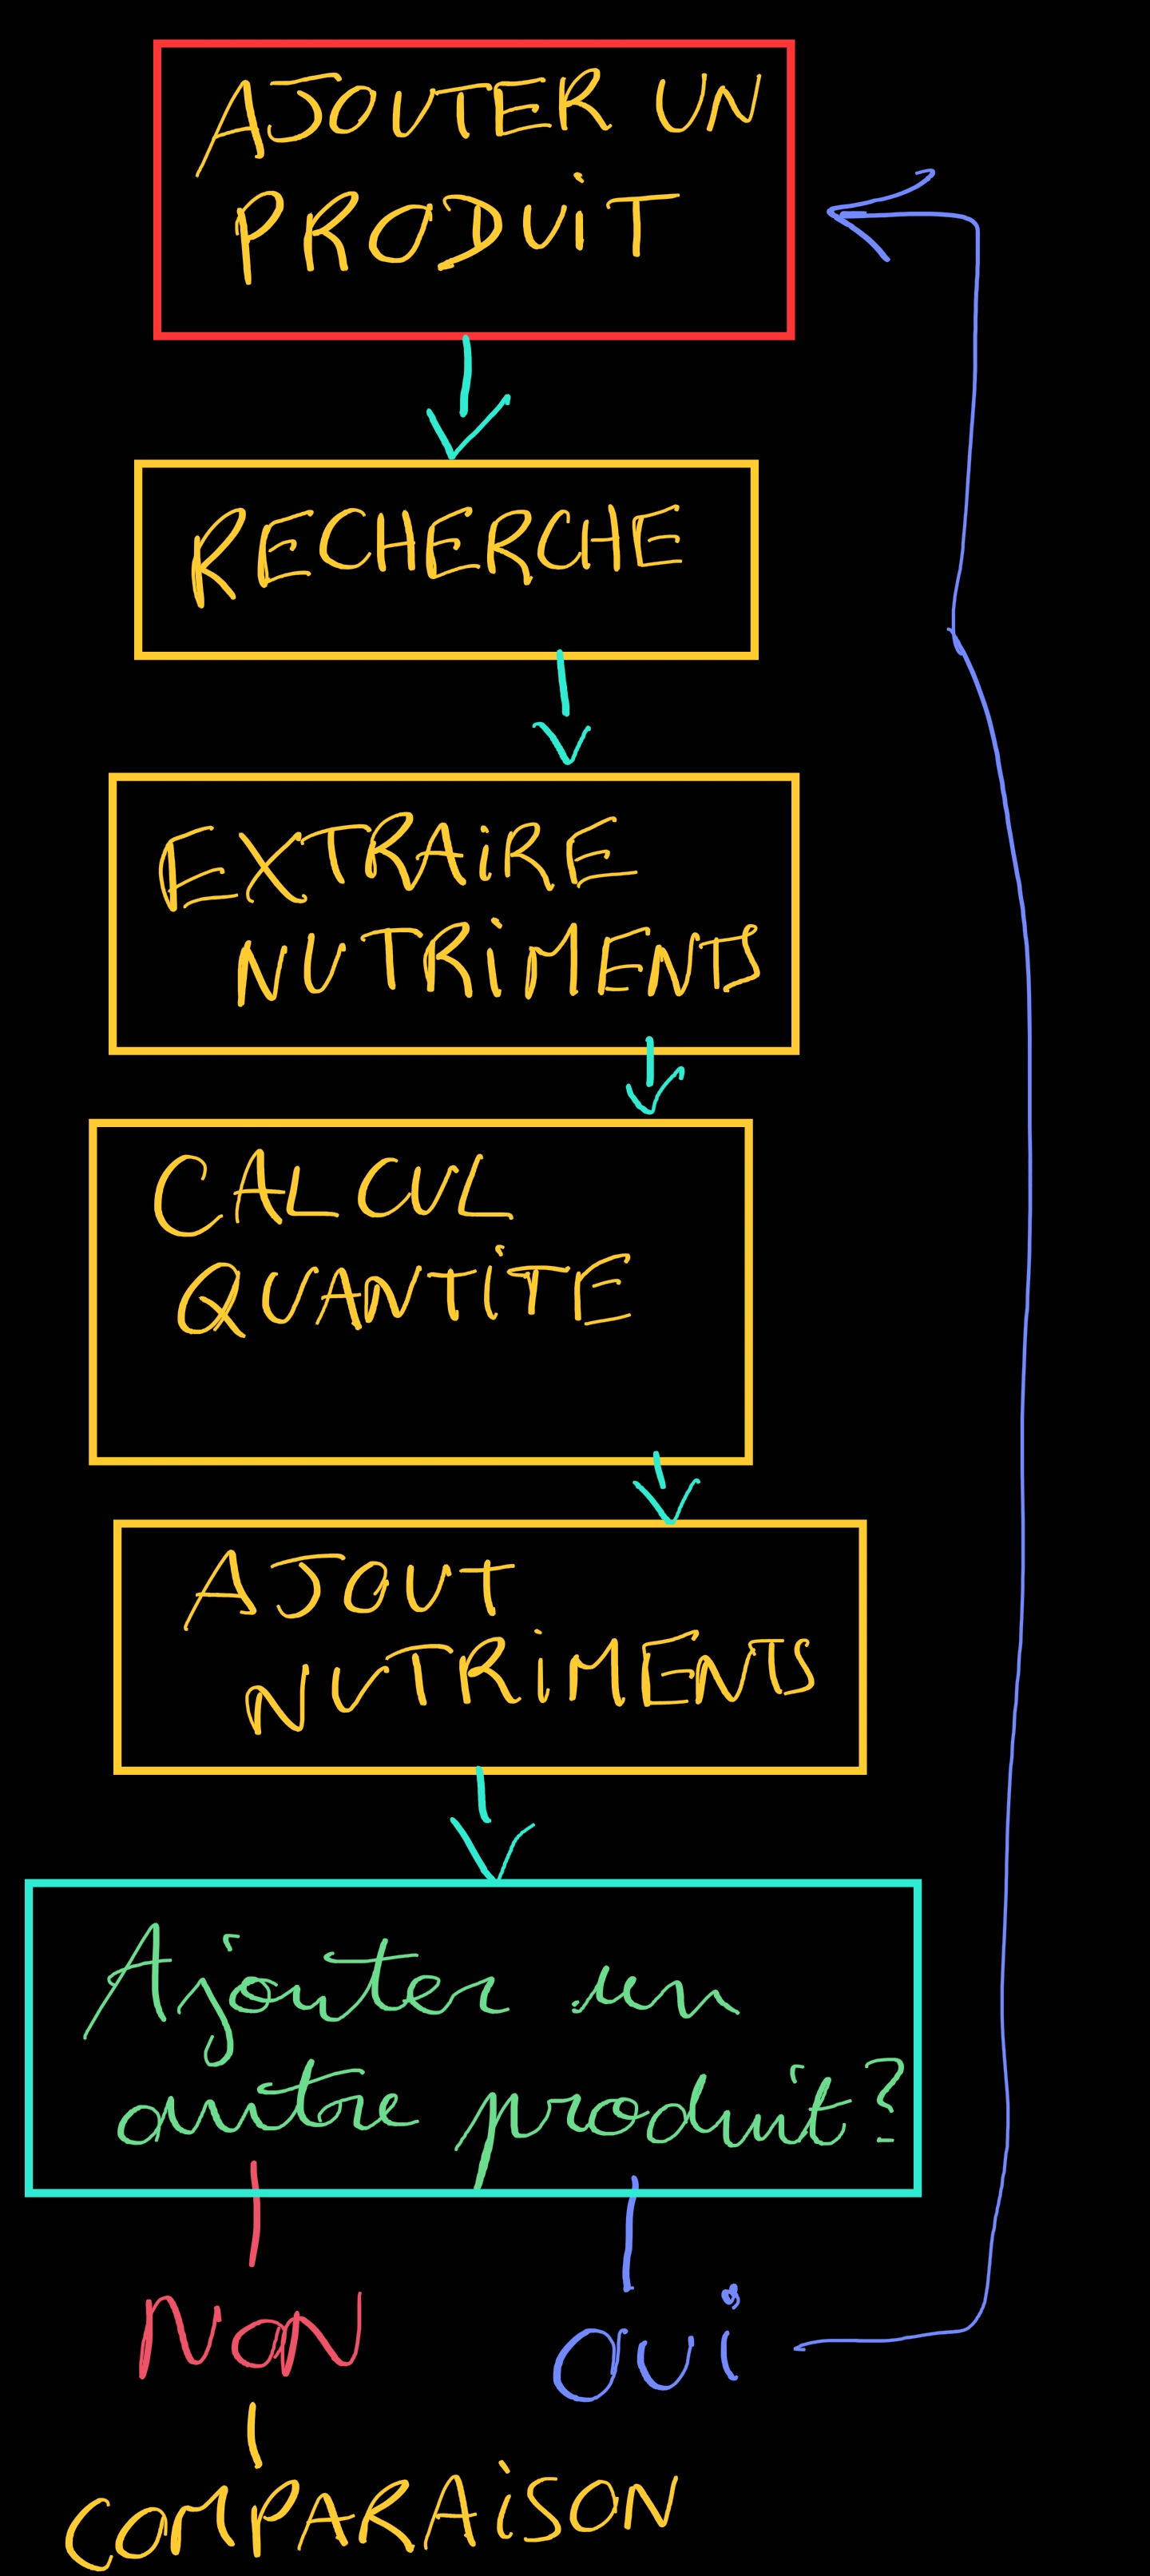

### Partie Poids et IMC

Cette partie est plus légère que la partie nutrition. Elle doit être capable de :

- Demander à l'utilisateur son poids en kg au jour de l'exécution du programme, et enregistrer ce poids
- Demander à l'utilisateur sa taille en cm au jour de l'exécution du programme, et enregistrer cette taille
- Calculer l'IMC, et retourner une interprétation de l'IMC
- Calculer et retourner l'évolution entre les deux données les plus récentes de la sauvegarde du profil de l'utilisateur

La poids, la taille, et l'IMC étant liés, ces trois éléments seront modifiés et sauvegardés grâce à une seule fonction prenant en argument le dictionnaire de sauvegarde du poids, de la taille, et de l'IMC. Elle demandera à l'utilisateur d'entrer le poids et la taille mesurés aujourd'hui, calculera l'IMC, et stockera la valeur du poids, de la taille et de l'IMC dans leur dictionnaire respectif, avec en clé le jour d'exécution du logiciel.

Réalisons d'abord la fonction calculant l'IMC :

In [22]:
def calcul_IMC(poids, taille):
    """Fonction prenant en argument le poids en float ou entier, la taille en entier, 
    et retourne le calcul de l'imc arrondi à 2 chiffres après la virgule"""
    return round(poids / (taille / 100) ** 2, 2)

Nous pouvons maintenant réaliser la fonction mettant à jout toutes les données.

In [23]:
def gestion_poids(save_poids, save_taille, save_imc):
    """Fonction prenant en argument les sauvegardes du profil utilisateur, demandant le poids et la taille du jour,
     calcule l'IMC et sauvegarde ces nouvelles informations"""

    poids = input("Entrez votre poids en kg : ")
    if ',' in poids:
        poids = poids.replace(',', '.') # On passe de l'écriture française à l'écriture anglaise d'un chiffre à virgule
    save_poids[jour] = float(poids)
    save_taille[jour] = int(input("Entrez votre taille en cm : "))
    save_imc[jour] = calcul_IMC(save_poids[jour], save_taille[jour])

In [25]:
test_poids = {}
test_taille = {}
test_imc = {}

Afin d'avoir des données pour la prochaine fonction, nous exécutons à des dates différentes le programme ci-dessous.

In [28]:
gestion_poids(test_poids, test_taille, test_imc)
print(test_poids, test_taille, test_imc)

Entrez votre poids en kg :  97.2
Entrez votre taille en cm :  173


{'2021-05-09': 95.8, '2021-05-08': 97.2} {'2021-05-09': 173, '2021-05-08': 173} {'2021-05-09': 32.01, '2021-05-08': 32.48}


Nous devons désormais calculer et afficher l'évolution entre les deux données les plus récentes des sauvegardes. Là aussi nous tirons avantage des dictionnaires, nous pouvons facilement récupérer les dates, notamment les deux dates les plus récentes en triant la liste de clé dans l'ordre croissant, et en prenant les deux derniers éléments de la liste. Il nous reste plus qu'à comparer, et à retourner cette comparaison. On a donc :

In [38]:
def evolution(save_imc, save_poids, save_taille):
    """Fonction prenant en argument les sauvegardes de l'imc, du poids et de la taille de l'utilisateur, et retourne un
    dictionnaire contenant l'évolution de chacune de ces données"""
    res = {}
    dates = sorted(list(save_imc))
    if len(dates) >= 2:
        poids_j1 = save_poids[dates[len(dates) - 2]]
        poids_j0 = save_poids[dates[len(dates) - 1]]
        taille_j1 = save_taille[dates[len(dates) - 2]]
        taille_j0 = save_taille[dates[len(dates) - 1]]
        imc_j1 = save_imc[dates[len(dates) - 2]]
        imc_j0 = save_imc[dates[len(dates) - 1]]
        res["evo_poids"] = round(poids_j0 - poids_j1, 2)
        res["evo_taille"] = taille_j0 - taille_j1
        res["evo_imc"] = round(imc_j0 - imc_j1, 2)
    else:
        res = "L'évolution ne peut pas encore être calculée"
    return res

In [39]:
evolution(test_imc, test_poids, test_taille)

{'evo_poids': -1.4, 'evo_taille': 0, 'evo_imc': -0.47}

Nous avons désormais toutes les fonctions nécessaires pour le traitement des données pondérales et nutritionnelles du logiciel.